<font size="5"><b>Loading Libraries </b><font>

In [346]:
#import all needed libraries for the whole excercise 
#my tweepy account is not approved yet, so i downloaded the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
import datetime as dt

<font size="5"><b>Gathering Data for this Project</b><font>

In [347]:
#read the first file and view the data 

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [348]:
# download image tsv file from a website programmatically using requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
resp = requests.get(url)
# Save to tsv file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(resp.content)

# load second file and view the data
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [349]:
#  extract data to dataframe, and close the file afterward
tweets_data = []
tweet_file = open('tweet-json.txt', 'r')
for line in tweet_file:
    try:
        tweetline = json.loads(line)
        tweets_data.append(tweetline)
    except:
        continue
tweet_file.close()

In [350]:
# Convert last file to dataframe,include only requested data so we data gathering is completed
tweet_info = pd.DataFrame()
tweet_info['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))
# check data structure
tweet_info.head()
tweet_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<font size="5"><b>Assessing Data for this Project
 </b><font>

In [351]:
#assessing first file twitter_archive
twitter_archive.info()
#first thing to notice, there are some columns with missing values like in_reply_to_status_id and in_reply_to_user_id, also the 
#retweeted columns, some of the urls are missing (2297 values only)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [352]:
twitter_archive.head()



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [353]:
#checking duplicating in tweet_id
sum(twitter_archive.tweet_id.duplicated())
#no duplication in tweet id, should be unique, yet it's int, better to be str

#timestamp is not date time
#four columns for dog type
#181 columns are retweets

0

In [354]:
#check the source for errors
twitter_archive.source.value_counts()
# most of data from twitter.com yet, there other soures like vine.co

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [355]:
#checking data numberator
twitter_archive.rating_numerator.value_counts()
#too many values, better to have look of the data description

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [356]:
twitter_archive.describe()
#there are outliers as maximum data is 1776 and 75% is 12

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [357]:
#checking denominator
twitter_archive.rating_denominator.value_counts()
# two things to notice, there are different data in the denominator than 10, needs to be unified with numerator, and to drop the zero
# also data is int, better to be flaat


10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [358]:
#checking the name column

twitter_archive.name.value_counts()
#many dogs has no names, some dogs has wrong names like 'a' with 55 records

None        745
a           55 
Charlie     12 
Cooper      11 
Oliver      11 
Lucy        11 
Lola        10 
Tucker      10 
Penny       10 
Winston     9  
Bo          9  
Sadie       8  
the         8  
Toby        7  
an          7  
Bailey      7  
Buddy       7  
Daisy       7  
Oscar       6  
Stanley     6  
Jack        6  
Bella       6  
Milo        6  
Leo         6  
Scout       6  
Rusty       6  
Dave        6  
Koda        6  
Jax         6  
George      5  
           ..  
Bubba       1  
Andy        1  
Mimosa      1  
Pluto       1  
Henry       1  
Marlee      1  
Jennifur    1  
Mac         1  
Antony      1  
Chuq        1  
Timmy       1  
Aqua        1  
Fabio       1  
his         1  
Ralphy      1  
Laika       1  
Georgie     1  
Brockly     1  
Gordon      1  
Wafer       1  
Mason       1  
Nugget      1  
Jarvis      1  
Noosh       1  
Iggy        1  
Remus       1  
Orion       1  
Mary        1  
Huck        1  
General     1  
Name: name, Length: 957,

In [359]:
#assessing second file image_predictions
image_predictions.info()
#no missing values
#checking data head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [360]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [361]:
#check tweet id for duplication
sum(image_predictions.tweet_id.duplicated())
#no duplication

0

In [362]:
image_predictions.img_num.value_counts()
#some colums has more than 1 photo

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [363]:
#find totally wrong predections

image_predictions[~(image_predictions['p1_dog']==True) & ~(image_predictions['p2_dog']==True) & ~(image_predictions['p3_dog']==True)].count()

#there are 324 dogs with all false predections

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [364]:
#checking third dataframe tweet_info
tweet_info.info()
#no missing values, all data are int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [365]:
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [366]:
#check ids for duplications 
sum(tweet_info.tweet_id.duplicated())
#no duplication

0

<font size="5"><b>Assessment Results </b><font>

<b>Quality</b>


        1-Convert timestamp to datetime
        2-Remove retweets(Keep original Tweets only)
        3-Remove replies to retweets(keep original tweets only)
        4-Change Source from long HTML code to simple text
        5-Fix rating_denominator by removing the "Zeros" 
        6-Change rating_numerator and rating_denominator to float
        7-Fix rating_numerator , by dividing by the denomintor and remove outliers
        8-Fix wrong dog names 
        9-Tweet_id datatype is an integer, convert to string
        10-Remove duplicate jpg_url
        11-Convert confidence levels to a percentage by multiplying by 100
        12-create new column for breed and confidnece each 
        
<b>Tidiness</b>

        1-gather dog columns  (doggo, puppo, pupper, floofer) into one
        2-Rename P_1, P_2 P_3 with more understandable names
        3-create a new column to predecit if dog or not (Dog, Maybe Dog, Not Dog)
        4-Merge data frames 


<font size="5"><b>Cleaning Data for this Project
 </b><font>

In [367]:
#first create copies from the 3 data sets
archive_clean = twitter_archive.copy()
image_clean = image_predictions.copy()
tweet_clean = tweet_info.copy()

<b> Define </b>

Timestamp in twitter_archive is object, needs to be changed to datetime

<b> Code </b>

In [368]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

<b> Test </b>

In [369]:
archive_clean['timestamp'].sample(5)

1295   2016-03-10 17:35:20
1553   2016-01-18 02:21:04
420    2017-01-19 19:25:24
155    2017-05-09 02:29:07
1715   2015-12-25 03:00:14
Name: timestamp, dtype: datetime64[ns]

<b> Define </b>

There are retweets in twitter_archive, while we are intersted in Original Tweets only

<b> Code </b>

In [370]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]


<b> Test </b>

In [371]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

<b> Define </b>

Remove reply tweets in twitter_archive, as we are only in intersted in original Tweets

<b> Code </b>

In [372]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

<b> Test </b>

In [373]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

<b> Define </b>

Drop Retweet related columns in twitter_archive as it has no value now

<b> Code </b>

In [374]:
archive_clean= archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis=1)

<b> Test </b>

In [375]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


<b> Define </b>

Source HTML code is complicated and hard to read, need to simplify it 

<b> Code </b>

In [376]:
source_O = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
            '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}
archive_clean["source"].replace(source_O, inplace=True)

<b> Test </b>

In [377]:
archive_clean.source.value_counts()

Twitter for iPhone    1964
Vine                  91  
Twitter Web Client    31  
TweetDeck             11  
Name: source, dtype: int64

<b> Define </b>

Too many columns for dog stages, gather dog columns  (doggo, puppo, pupper, floofer) into one, call it dog_stage, then drop the extra dogs columns

<b> Code </b>

In [378]:
archive_clean.doggo= archive_clean.doggo.replace('None', '')
archive_clean.floofer= archive_clean.floofer.replace('None', '')
archive_clean.pupper= archive_clean.pupper.replace('None', '')
archive_clean.puppo= archive_clean.puppo.replace('None', '') 

archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

archive_clean.loc[archive_clean.dog_stage == '', 'dog_stage'] = "None"

archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage']= 'Multiple'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage']= 'Multiple'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'Multiple'

archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

<b> Test </b>

In [379]:
archive_clean.dog_stage.value_counts()
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None


<b> Define </b>

Fix denominator by removing the "Zeros"

<b> Code </b>

In [380]:
twitter_archive = twitter_archive[twitter_archive.rating_denominator != 0]

<b> Test </b>

In [381]:
twitter_archive.query('rating_denominator== 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<b> Define </b>

8- Fix denominator and numerator to Floats

<b> Code </b>

In [382]:
archive_clean.rating_numerator= archive_clean.rating_numerator.astype(float)
archive_clean.rating_denominator= archive_clean.rating_denominator.astype(float)

<b> Test </b>


In [383]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 163.8+ KB


<b> Define </b>

Fix rating_numerator , by dividing by the denomintor and remove outliers

<b> Code </b>

In [384]:
archive_clean ['rating_numerator']= (archive_clean['rating_numerator']/archive_clean['rating_denominator'] )*10
archive_clean = archive_clean[archive_clean.rating_numerator <15]

<b> Test </b>

In [385]:
archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14.000000    38 
13.000000    287
12.000000    490
11.000000    418
10.000000    438
9.000000     153
8.181818     1  
8.000000     98 
7.000000     51 
6.363636     1  
6.000000     32 
5.000000     35 
4.000000     15 
3.000000     19 
2.000000     10 
1.000000     4  
0.000000     1  
Name: rating_numerator, dtype: int64

<b> Define </b>

Convert confience level to number out of 100

<b> Code </b>

In [386]:
confidence = ['p1_conf', 'p2_conf', 'p3_conf']
for con in confidence:
    image_clean[con] = round(image_clean[con]*100).astype(int)

<b> Test </b>

In [387]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,47,True,collie,16,True,Shetland_sheepdog,6,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,51,True,miniature_pinscher,7,True,Rhodesian_ridgeback,7,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,60,True,malinois,14,True,bloodhound,12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,41,True,redbone,36,True,miniature_pinscher,22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56,True,Rottweiler,24,True,Doberman,15,True


<b> Define </b>

Change p1,p2,p3 to more understandable names

<b> Code </b>

In [388]:
image_clean.rename(columns={'p1': 'prediction_1','p2': 'prediction_2','p3': 'prediction_3'}, inplace=True)

<b> Test </b>

In [389]:
image_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,47,True,collie,16,True,Shetland_sheepdog,6,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,51,True,miniature_pinscher,7,True,Rhodesian_ridgeback,7,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,60,True,malinois,14,True,bloodhound,12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,41,True,redbone,36,True,miniature_pinscher,22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56,True,Rottweiler,24,True,Doberman,15,True


<b> Define </b>

Fix dog name issue in archive_clean, not all names are correct

<b> Code </b>

In [390]:
wrong_name = archive_clean.name.str.islower()
archive_clean.loc[wrong_name, 'name'] = 'None'

<b> Test </b>

In [391]:
archive_clean.name.value_counts()

None        705
Charlie     11 
Lucy        11 
Oliver      10 
Cooper      10 
Penny       9  
Tucker      9  
Sadie       8  
Winston     8  
Lola        8  
Toby        7  
Daisy       7  
Bella       6  
Bo          6  
Oscar       6  
Koda        6  
Bailey      6  
Jax         6  
Stanley     6  
Dave        5  
Chester     5  
Leo         5  
Rusty       5  
Scout       5  
Bentley     5  
Milo        5  
Buddy       5  
Louis       5  
Cassie      4  
Reggie      4  
           ..  
Rose        1  
Shelby      1  
Anakin      1  
Walker      1  
Lassie      1  
Trevith     1  
Cheryl      1  
Sailer      1  
Carter      1  
Canela      1  
Rizzo       1  
Laela       1  
Marvin      1  
Dunkin      1  
Daniel      1  
Ricky       1  
Snickers    1  
Lili        1  
Adele       1  
Mitch       1  
Sierra      1  
Baron       1  
Lance       1  
Pepper      1  
Bilbo       1  
Halo        1  
Taco        1  
Willie      1  
Monty       1  
General     1  
Name: name, Length: 929,

<b> Define </b>

Fix URL duplication in image_clean

<b> Code </b>

In [392]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

<b> Test </b>

In [393]:
image_clean.jpg_url.duplicated().value_counts()

False    2009
Name: jpg_url, dtype: int64

<b> Define </b>

Merge Data Frames for simplicity

<b> Code </b>

In [394]:
twitter_archive_master = pd.merge(archive_clean, tweet_clean, on='tweet_id', how = 'inner')
twitter_archive_master = pd.merge(twitter_archive_master, image_clean, on='tweet_id')

<b> Test </b>

In [395]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 22 columns):
tweet_id              1899 non-null int64
timestamp             1899 non-null datetime64[ns]
source                1899 non-null object
text                  1899 non-null object
expanded_urls         1899 non-null object
rating_numerator      1899 non-null float64
rating_denominator    1899 non-null float64
name                  1899 non-null object
dog_stage             1899 non-null object
retweet_count         1899 non-null int64
favorite_count        1899 non-null int64
jpg_url               1899 non-null object
img_num               1899 non-null int64
prediction_1          1899 non-null object
p1_conf               1899 non-null int64
p1_dog                1899 non-null bool
prediction_2          1899 non-null object
p2_conf               1899 non-null int64
p2_dog                1899 non-null bool
prediction_3          1899 non-null object
p3_conf               1899 non-nu

<b> Define </b>

Change tweet_id to str

<b> Code </b>

In [396]:
twitter_archive_master['tweet_id']=twitter_archive_master['tweet_id'].astype(str)

<b> Test </b>

In [397]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 22 columns):
tweet_id              1899 non-null object
timestamp             1899 non-null datetime64[ns]
source                1899 non-null object
text                  1899 non-null object
expanded_urls         1899 non-null object
rating_numerator      1899 non-null float64
rating_denominator    1899 non-null float64
name                  1899 non-null object
dog_stage             1899 non-null object
retweet_count         1899 non-null int64
favorite_count        1899 non-null int64
jpg_url               1899 non-null object
img_num               1899 non-null int64
prediction_1          1899 non-null object
p1_conf               1899 non-null int64
p1_dog                1899 non-null bool
prediction_2          1899 non-null object
p2_conf               1899 non-null int64
p2_dog                1899 non-null bool
prediction_3          1899 non-null object
p3_conf               1899 non-n

<b> Define </b>

Find out which is dog and which is not 

<b> Code </b>

In [398]:
ps_dogs = ['p1_dog', 'p2_dog', 'p3_dog']
for p in ps_dogs:
    twitter_archive_master[p] = twitter_archive_master[p].astype(int)
# Create a new column to sum the resuly
twitter_archive_master['prediction'] = twitter_archive_master.p1_dog + twitter_archive_master.p2_dog + twitter_archive_master.p3_dog
# Replace the number with a defining text string
twitter_archive_master['prediction'] = twitter_archive_master['prediction'].replace(3, 'Dog')
twitter_archive_master['prediction'] = twitter_archive_master['prediction'].replace(2, 'Maybe a Dog')
twitter_archive_master['prediction'] = twitter_archive_master['prediction'].replace(1, 'Maybe a Dog')
twitter_archive_master['prediction'] = twitter_archive_master['prediction'].replace(0, 'Not a Dog')


<b> Test </b>

In [399]:
twitter_archive_master.prediction.value_counts()

Dog            1154
Maybe a Dog    448 
Not a Dog      297 
Name: prediction, dtype: int64

<b> Define </b>

Merge the breed and confidnece in one column each, and drop the extra columns

<b> Code </b>

In [400]:
conditions = [(twitter_archive_master['p1_dog'] == True), (twitter_archive_master['p2_dog'] == True), (twitter_archive_master['p3_dog'] == True)]
choices_breed = [twitter_archive_master['prediction_1'],twitter_archive_master['prediction_2'],twitter_archive_master['prediction_3']]
choices_confidence = [twitter_archive_master['p1_conf'], twitter_archive_master['p2_conf'],twitter_archive_master['p3_conf']]
twitter_archive_master['breed'] = np.select(conditions, choices_breed, default = 'none')
twitter_archive_master['confidence'] = np.select(conditions, choices_confidence, default = 0)
twitter_archive_master= twitter_archive_master.drop(['prediction_1','prediction_2','prediction_3','p1_conf','p2_conf','p3_conf','p1_dog','p2_dog','p3_dog'], axis=1)

<b> Test </b>

In [401]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1899 entries, 0 to 1898
Data columns (total 16 columns):
tweet_id              1899 non-null object
timestamp             1899 non-null datetime64[ns]
source                1899 non-null object
text                  1899 non-null object
expanded_urls         1899 non-null object
rating_numerator      1899 non-null float64
rating_denominator    1899 non-null float64
name                  1899 non-null object
dog_stage             1899 non-null object
retweet_count         1899 non-null int64
favorite_count        1899 non-null int64
jpg_url               1899 non-null object
img_num               1899 non-null int64
prediction            1899 non-null object
breed                 1899 non-null object
confidence            1899 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 252.2+ KB


<font size="5"><b>Storing, Analyzing, and Visualizing Data for this Project </b><font>

In [402]:
#Storing clear data

twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')


In [403]:
twitter_archive_master.rating_numerator.value_counts()

12.000000    431
10.000000    411
11.000000    381
13.000000    233
9.000000     150
8.000000     95 
7.000000     51 
5.000000     34 
6.000000     32 
14.000000    30 
3.000000     19 
4.000000     15 
2.000000     10 
1.000000     4  
0.000000     1  
8.181818     1  
6.363636     1  
Name: rating_numerator, dtype: int64

In [404]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,10.482646,10.497104,2528.282254,8344.863086,1.201159,46.546603
std,2.194706,6.980959,4213.375998,11437.628183,0.557144,34.066264
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.000000
25%,10.000000,10.000000,612.500000,1871.500000,1.000000,14.000000
50%,11.000000,10.000000,1305.000000,3904.000000,1.000000,46.000000
75%,12.000000,10.000000,2933.500000,10399.000000,1.000000,78.000000
max,14.000000,170.000000,79515.000000,132810.000000,4.000000,100.000000


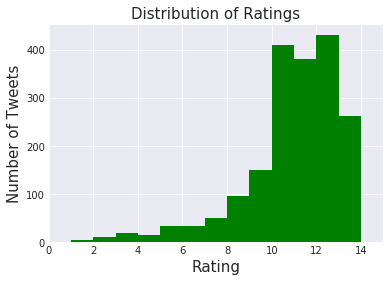

In [405]:
#first to find the distribution of dog rating 
twitter_archive_master['rating_numerator'].plot(kind = 'hist', bins = 14,color='green', linestyle='dashed');
sns.set_style("darkgrid")
plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 15)
plt.xlabel('Rating', fontsize = 15)
plt.title('Distribution of Ratings', fontsize = 15);
plt.savefig('Distribution rating.png');



Rating distribution is skewed to the left. most of ratings is about 10, as it's clear from the data description above 75% of all ratings are above 10.


In [406]:
#Top 10 favorite tweets
twitter_archive_master.sort_values(by = 'favorite_count', ascending = False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction,breed,confidence
301,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Dog,Lakeland_terrier,20
723,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Maybe a Dog,Labrador_retriever,83
57,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10.0,Duddles,None,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,1,Dog,English_springer,38
106,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,10.0,Jamesy,pupper,32883,106827,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,Dog,French_bulldog,91
92,870374049280663552,2017-06-01 20:18:38,Twitter for iPhone,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,https://twitter.com/dog_rates/status/870374049280663552/photo/1,13.0,10.0,Zoey,None,27680,85011,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,Dog,golden_retriever,84
132,859196978902773760,2017-05-02 00:04:57,Twitter for iPhone,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,https://twitter.com/dog_rates/status/859196978902773760/video/1,12.0,10.0,None,None,25661,75193,https://pbs.twimg.com/ext_tw_video_thumb/859196962498805762/pu/img/-yBpr4-o4GJZECYE.jpg,1,Maybe a Dog,malamute,22
755,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10.0,None,doggo,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1,Dog,Eskimo_dog,50
64,877736472329191424,2017-06-22 03:54:17,Twitter for iPhone,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r,"https://twitter.com/dog_rates/status/877736472329191424/photo/1,https://twitter.com/dog_rates/status/877736472329191424/photo/1",13.0,10.0,Aja,None,17300,71144,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,2,Dog,Chesapeake_Bay_retriever,84
32,884925521741709313,2017-07-12 00:01:00,Twitter for iPhone,"This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl https://t.co/MYJvdlNRVa",https://twitter.com/dog_rates/status/884925521741709313/photo/1,12.0,10.0,Earl,None,16439,68152,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,1,Dog,Italian_greyhound,26
1404,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ,https://twitter.com/dog_rates/status/676219687039057920/photo/1,10.0,10.0,Kenneth,None,31989,67100,https://pbs.twimg.

In [407]:
#Top 10 re-tweeted tweets
twitter_archive_master.sort_values(by = 'retweet_count', ascending = False).head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction,breed,confidence
723,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10.0,None,doggo,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Maybe a Dog,Labrador_retriever,83
755,739238157791694849,2016-06-04 23:31:25,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,https://twitter.com/dog_rates/status/739238157791694849/video/1,13.0,10.0,None,doggo,52360,75163,https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg,1,Dog,Eskimo_dog,50
301,822872901745569793,2017-01-21 18:26:02,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,https://twitter.com/dog_rates/status/822872901745569793/photo/1,13.0,10.0,None,puppo,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Dog,Lakeland_terrier,20
57,879415818425184262,2017-06-26 19:07:24,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10.0,Duddles,None,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,1,Dog,English_springer,38
590,761672994376806400,2016-08-05 21:19:27,Twitter for iPhone,Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy. 10/10 for all (by happytailsresort) https://t.co/EY8kEFuzK7,https://twitter.com/dog_rates/status/761672994376806400/video/1,10.0,10.0,None,None,33421,55016,https://pbs.twimg.com/ext_tw_video_thumb/761672828462718981/pu/img/R00UYAAWB3GtuHdI.jpg,1,Not a Dog,none,0
106,866450705531457537,2017-05-22 00:28:40,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr","https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13.0,10.0,Jamesy,pupper,32883,106827,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,2,Dog,French_bulldog,91
1404,676219687039057920,2015-12-14 01:58:31,Twitter for iPhone,This is Kenneth. He's stuck in a bubble. 10/10 hang in there Kenneth https://t.co/uQt37xlYMJ,https://twitter.com/dog_rates/status/676219687039057920/photo/1,10.0,10.0,Kenneth,None,31989,67100,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg,1,Maybe a Dog,whippet,0
327,817827839487737858,2017-01-07 20:18:46,Twitter for iPhone,This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) https://t.co/q2BgNIi3OA,https://twitter.com/dog_rates/status/817827839487737858/video/1,13.0,10.0,Buddy,None,31314,57622,https://pbs.twimg.com/ext_tw_video_thumb/817827663108771841/pu/img/e9oi839RGWJR37jF.jpg,1,Dog,cocker_spaniel,39
1346,678399652199309312,2015-12-20 02:20:55,Twitter for iPhone,This made my day. 12/10 please enjoy https://t.co/VRTbo3aAcm,https://twitter.com/dog_rates/status/678399652199309312/video/1,12.0,10.0,None,None,30742,61794,https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg,1,Maybe a Dog,Bedlington_terrier,2
429,795464331001561088,2016-11-07 03:14:10,Twitter for iPhone,Elder doggo does a splash. Both 13/10 incredible stuff https://t.co/gBUDjdEcqz,https://twitter.com/dog_rates/status/795464331001561088/video/1,13.0,10.0,None,doggo,27728,55683,https://pbs.twimg.com/ext_tw_video_thumb/795464066940764160/pu/img/jPkMMQXdydb7CqFX.jpg,1,Dog,golden_retriever,19


Most of dogs types are not identified, yet the most common type is pupper, then the doggo

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:521: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


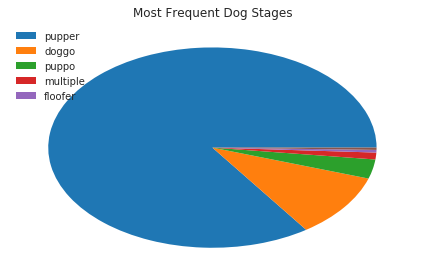

In [412]:
plt.pie(twitter_archive_master.query("dog_stage!='none'").dog_stage.value_counts(),shadow=False)

plt.legend(twitter_archive_master.query("dog_stage!='none'").dog_stage.value_counts(),labels=["pupper", "doggo", "puppo", "multiple",  "floofer"],  loc="upper left")

plt.title('Most Frequent Dog Stages')
plt.tight_layout()
plt.savefig('Most frequesnt Dog.png');


above graph presents that pupper is top dog stage in tweets, exculding the non-identifed dogs

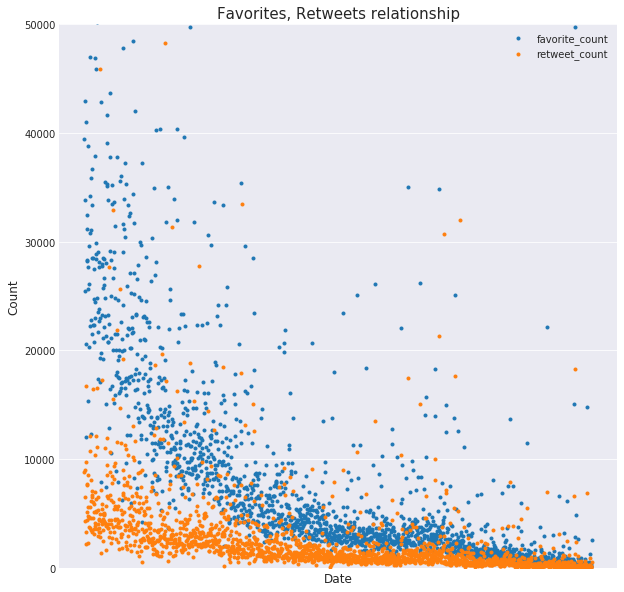

In [413]:
twitter_archive_master[['favorite_count', 'retweet_count']].plot(style ='.', ylim=[0, 50000], figsize=(10,10))
plt.title('Favorites, Retweets relationship', size=15)
plt.xlabel('Date', size=12)
plt.xticks([], [])
plt.ylabel('Count', size=12)
plt.legend(ncol=1, loc='upper right')
plt.savefig('retweets-favorites-time.png');

the relationship between favorite and retweets, shows that people used to favorite the tweets more than retweeting it, but by time, they became similar to each other

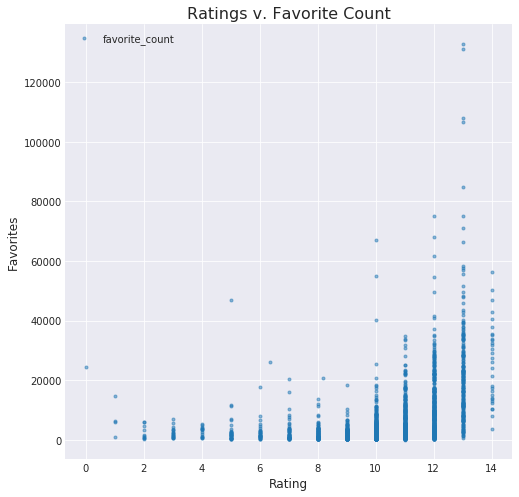

In [414]:
twitter_archive_master.plot(x = 'rating_numerator', y = 'favorite_count', style ='.', figsize=(8,8), alpha=.5)
plt.title('Ratings v. Favorite Count', size=16)
plt.xlabel('Rating', size=12)
plt.ylabel('Favorites', size=12);
plt.savefig('rating Vs favorite.png');


There is a positive relationship between the dog rate and the favorite count, dog with higher rate get more favorites

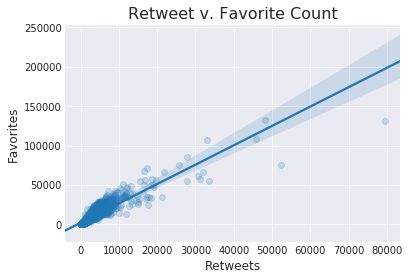

In [415]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_master, scatter_kws={'alpha':0.2})
plt.title('Retweet v. Favorite Count', size=16)
plt.xlabel('Retweets', size=12)
plt.ylabel('Favorites', size=12)
plt.savefig('retweet-favorite.png');

The graph shows that the more the tweet is retweeted, the more it gets favorite

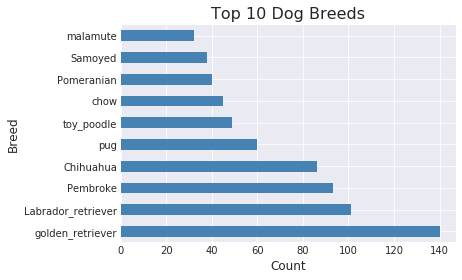

In [416]:
top_breeds = twitter_archive_master.query("breed!='none'").breed.value_counts()[0:10].sort_values(axis=0, ascending=False)
top_breeds.plot(kind = 'barh', color=['steelblue'])
plt.title('Top 10 Dog Breeds', size=16)
plt.xlabel('Count', size=12)
plt.ylabel('Breed', size=12)
plt.savefig('top-breeds.png');


The graph above presents top 10 dog breeds mentioned in tweets

Dog            1154
Maybe a Dog    448 
Not a Dog      297 
Name: prediction, dtype: int64

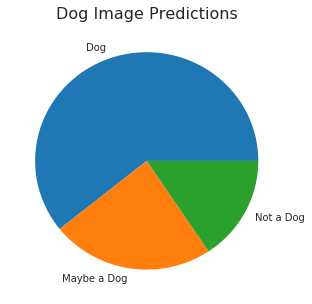

In [417]:
twitter_archive_master['prediction'].value_counts().plot(kind='pie', figsize=(5,5),)
plt.title('Dog Image Predictions',fontsize=16);
plt.ylabel('');
plt.savefig('dog predection');
twitter_archive_master.prediction.value_counts()

Around 60% of the dogs were identified as dogs by the software, while another 23% might be dogs, the rest could not be identified as dogs

In [418]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,jpg_url,img_num,prediction,breed,confidence
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Not a Dog,none,0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Dog,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Dog,Chihuahua,72
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Maybe a Dog,Labrador_retriever,17
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Dog,basset,56


In [419]:
twitter_archive_master.name.value_counts()[1:11]

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker     8 
Winston    8 
Sadie      8 
Penny      8 
Toby       7 
Daisy      7 
Name: name, dtype: int64

Mentioned above, the most common name for dogs nowdays, as it seems Charlie is the most common one